In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import kelp_param
import kelp3d_objs as k3
import ipyparallel as ipp
import concurrent.futures as cf
import itertools as it
#from sympy import divisors
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.interpolate import interp1d
import ipyvolume as ipv

In [23]:
import kelp_compute
import kelp_analyze
import discrete_plot

In [4]:
import sqlite3
import shutil
import os

## Analyze Grid Study

## Whole cube

In [7]:
def cori_grid_study_plot_full(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_full(db_path, study_name)
    )
    
    #return ipv.quickvolshow(abs_err_arr),
    return abs_err_arr, rel_err_arr


In [8]:
abs_err_arr, rel_err_arr = cori_grid_study_plot_full('gs22all_top_heavy')

/global/u2/o/oevans/kelp/code/python/kelp_analyze.py:232: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


### Reproduce three edges plot

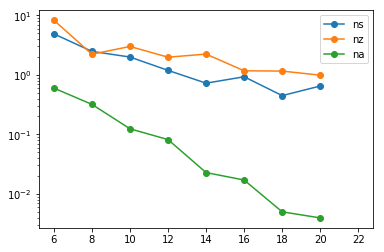

In [9]:
ns_list = nz_list = na_list = np.arange(6, 24, 2)
plt.figure()
plt.semilogy(ns_list, rel_err_arr[:,-1,-1], 'o-', label='ns')
plt.semilogy(nz_list, rel_err_arr[-1,:,-1], 'o-', label='nz')
plt.semilogy(na_list, rel_err_arr[-1,-1,:], 'o-', label='na')
plt.legend()
plt.show()

### Top faces

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


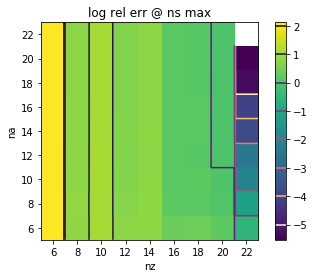

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


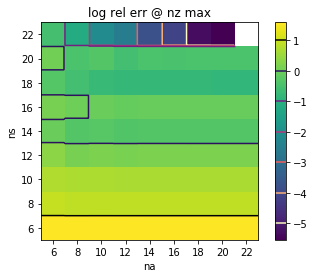

/global/homes/o/oevans/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


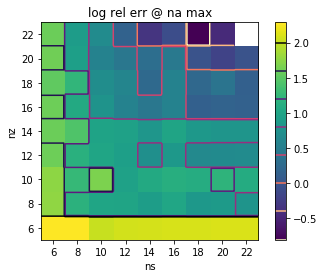

In [32]:
# ns max
ns_list = nz_list = na_list = np.arange(6, 24, 2)
plt.figure()
plt.title('log rel err @ ns max')
rel_err_ns_plane = np.log(rel_err_arr[-1,:,:])
discrete_plot.imshow_with_contours_and_zoom(
    nz_list, 
    na_list, 
    rel_err_ns_plane, 
    zoom_factor=4
)
plt.xlabel('nz')
plt.ylabel('na')
plt.show()

# nz max
nz_list = na_list = ns_list = np.arange(6, 24, 2)
plt.figure()
plt.title('log rel err @ nz max')
rel_err_nz_plane = np.log(rel_err_arr[:,-1,:].T)
discrete_plot.imshow_with_contours_and_zoom(
    na_list, 
    ns_list, 
    rel_err_nz_plane, 
    zoom_factor=4
)
plt.xlabel('na')
plt.ylabel('ns')
plt.show()

# na max
na_list = ns_list = nz_list = np.arange(6, 24, 2)
plt.figure()
plt.title('log rel err @ na max')
rel_err_na_plane = np.log(rel_err_arr[:,:,-1])
discrete_plot.imshow_with_contours_and_zoom(
    ns_list, 
    nz_list, 
    rel_err_na_plane, 
    zoom_factor=4
)
plt.xlabel('ns')
plt.ylabel('nz')
plt.show()

### Volume Plot + Isosurface

In [38]:
log_rel_err_arr = np.zeros_like(rel_err_arr)
pos = (rel_err_arr > 0)
log_rel_err_arr[pos] = np.log(rel_err_arr[pos])
ipv_discrete.volshow_zoom_correct_scale(
    ns_list, 
    nz_list, 
    na_list, 
    log_rel_err_arr, 
    zoom_factor=3
)
ipv.xlabel('ns')
ipv.ylabel('nz')
ipv.zlabel('na')

/global/u2/o/oevans/python/packages/ipyvolume/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


## Three edges

In [37]:
def cori_grid_study_plot_three_edges(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_edges(db_path, study_name)
    )

    kelp_analyze.grid_study_plot(
        perceived_irrad_dict, 
        abs_err_arr, 
        rel_err_arr, 
        compute_time_dict, 
        zmin, zmax
    )

In [ ]:
cori_grid_study_plot_three_edges('gs22all_top_heavy')

In [ ]:
cori_grid_study_plot_three_edges('gs22all_bottom_heavy')

In [ ]:
cori_grid_study_plot_three_edges('gs22all_high_scatter')